In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Feature Information:
Airline: Name of the Airline from which the Ticket is Booked.
Date_of_Journey: Date of Journey of the Travel.
Source: Source from which the Airline Would Departure.
Destination: Destination to Which Airline Would Arrive.
Route: Route of the Airline from Source to Destination.
Dep_Time: Time at which Flight Would Departure from the Source.
Arrival_Time: Time at which Flight Would Arrive at the Destination.
Duration: Duration that Airline Takes to fly from Source to Destination.
Total_Stops: Total No of Stops that Airline takes Between Source and Destination.
Additional_Info: Any Additional Info about the Airline.
Price: Fare of the Ticket to fly from Source to Destination.

In [295]:
ls

 add_info.jpg              'flight_price .ipynb'         Sample_submission.xlsx
 Data_Train.xlsx            preprocessed_dataTest.csv    Test_set.xlsx
'flight_price  (1).ipynb'   preprocessed_dataTrain.csv


IMPORT DATASET

In [296]:
train_data = pd.read_excel(r"Data_Train.xlsx")

Getting known to my Dataset

In [297]:
train_data.shape

(10683, 11)

In [298]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL ...,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [299]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [300]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [301]:
train_data.dropna(inplace=True)

In [302]:
train_data.shape

(10682, 11)

dataset had 1 nan value which is now dropped.

In [303]:
train_data.isnull().sum()

Airline                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [304]:
data_train=data_train.drop_duplicates()

In [305]:
# Checking for 0 value
zero_values = (data_train == 0).sum()
print(zero_values)

Total_Stops                                      3473
Price                                               0
Journey_day                                         0
Journey_month                                       0
Dep_hour                                           40
Dep_min                                          2039
Arrival_hour                                      321
Arrival_min                                      1417
Duration_hours                                      1
Duration_mins                                    1005
Airline_Air India                                8766
Airline_GoAir                                   10266
Airline_IndiGo                                   8417
Airline_Jet Airways                              6760
Airline_Jet Airways Business                    10454
Airline_Multiple carriers                        9264
Airline_Multiple carriers Premium economy       10447
Airline_SpiceJet                                 9645
Airline_Trujet              

Data cleaning and feature Engineering for Train data set

In [306]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [307]:
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [308]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL ...,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [309]:
train_data.drop(["Date_of_Journey"],axis=1, inplace=True)

In [310]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL ...,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [311]:
# Preprocessing the duration
train_data["Dep_hour"] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data.Dep_Time).dt.minute
train_data.drop(["Dep_Time"],axis=1, inplace=True)

In [312]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL ...,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [313]:
#Working  Arrival time 
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop(["Arrival_Time"],axis=1, inplace=True)

In [314]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL ...,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [315]:
duration = list(train_data["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m' #adds 0m
        else:
            duration[i] = '0h ' + duration[i] #ADDS 0 hour

duration_hours = []
duration_mins = []  
for i in range(len(duration)) :
    duration_hours.append(int(duration[i].split(sep = "h")[0])) #Extract hours from duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1])) #Extract only min from duration
    

In [316]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [317]:
train_data.drop(["Duration"],axis=1, inplace=True)

In [318]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL ...,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Dealing with categorical Data


In [319]:
train_data.columns

Index(['Airline                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [320]:
print(train_data.columns)

Index(['Airline                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [321]:
train_data.columns = train_data.columns.str.strip()
train_data.columns = train_data.columns.str.split().str[0]


In [322]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL ...,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [323]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

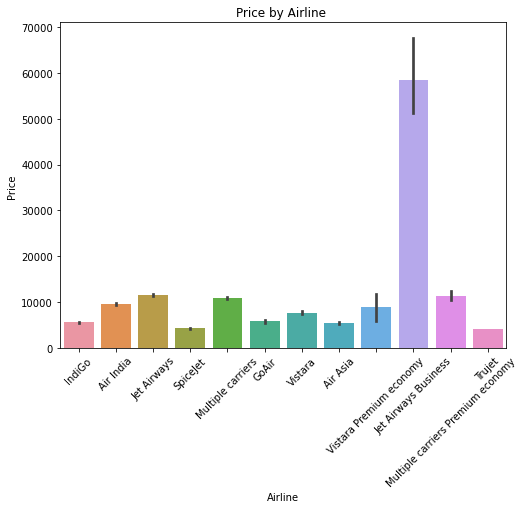

In [324]:
# Airline vs Price
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.barplot(x='Airline', y='Price', data=train_data)
# plt.show()



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

sns.barplot(x='Airline', y='Price', data=train_data)
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
plt.xlabel('Airline')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label
plt.title('Price by Airline ')  # Set plot title

plt.show()

In [325]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [326]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

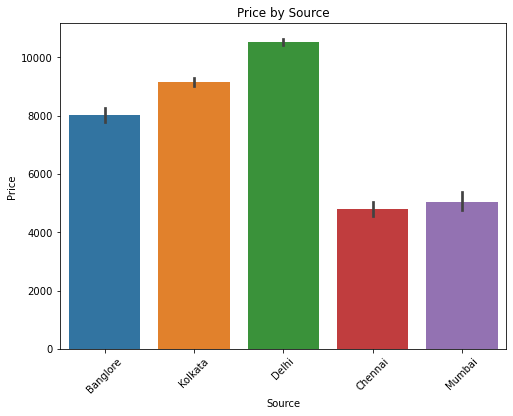

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

sns.barplot(x='Source', y='Price', data=train_data)
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
plt.xlabel('Source')  # Set x-axis label
plt.ylabel('Price')  # Set y-axis label
plt.title('Price by Source')  # Set plot title

plt.show()

Price varies from source location also 

In [328]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [329]:
# looking for destination values 
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [330]:
train_data["Destination"] = train_data["Destination"].replace({'New Delhi': 'Delhi'})

In [331]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [332]:
train_data["Route"].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1551
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → JDH → JAI → DEL → HYD       1
BOM → JLR → HYD                   1
BOM → DED → DEL → HYD             1
BOM → GOI → HYD                   1
BOM → BBI → HYD                   1
Name: Route, Length: 129, dtype: int64

In [333]:
train_data.drop(['Route'] , axis=1, inplace=True)

In [334]:
print("Train set:\n",train_data["Additional_Info"].value_counts())

Train set:
 No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


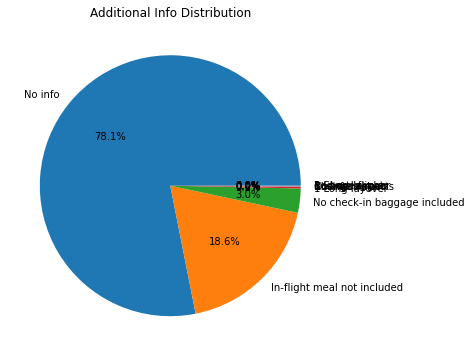

In [335]:
import matplotlib.pyplot as plt
import mplcursors


# Plotting the pie chart for 'Additional_Info'
plt.figure(figsize=(10, 6))
additional_info_counts = train_data['Additional_Info'].value_counts()
additional_info_pie = additional_info_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Additional Info Distribution')
plt.ylabel('')

# Adding cursor tooltip to display counts on zoom
cursor = mplcursors.cursor(additional_info_pie)
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    count = additional_info_counts[index]
    sel.annotation.set_text(f'Count: {count}')

plt.show()



In [336]:
# replace repeating value in train set
train_data["Additional_Info"] = train_data["Additional_Info"].replace({'No Info': 'No info'})

In [337]:
train_data["Additional_Info"] = train_data["Additional_Info"].replace({'No info': 'basic'})

In [338]:
train_data["Additional_Info"].value_counts()

basic                           8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [339]:
encoded_data = train_data[["Additional_Info"]]
encoded_data = pd.get_dummies(encoded_data, prefix="Additional_Info")
encoded_data.head()


,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Additional_Info_basic
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [340]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [341]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [342]:
train_data.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
train_data["Total_Stops"] = train_data["Total_Stops"].astype(int)

In [343]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,basic,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,basic,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,basic,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,basic,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,basic,13302,1,3,16,50,21,35,4,45


In [344]:
# Concatenate train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination,encoded_data], axis = 1)

In [345]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,...,Destination_Kolkata,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Additional_Info_basic
0,IndiGo,Banglore,Delhi,0,basic,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,basic,7662,1,5,5,50,...,0,0,0,0,0,0,0,0,0,1
2,Jet Airways,Delhi,Cochin,2,basic,13882,9,6,9,25,...,0,0,0,0,0,0,0,0,0,1
3,IndiGo,Kolkata,Banglore,1,basic,6218,12,5,18,5,...,0,0,0,0,0,0,0,0,0,1
4,IndiGo,Banglore,Delhi,1,basic,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [346]:
data_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage in

In [347]:
data_train.drop(["Airline", "Source", "Destination","Additional_Info"], axis = 1, inplace = True)

In [348]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Destination_Kolkata,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Additional_Info_basic
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,0,1
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,0,0,0,0,0,0,1
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,0,0,0,0,0,1
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [349]:
# Assuming your preprocessed DataFrame is named 'preprocessed_data'
data_train.to_csv('preprocessed_dataTrain.csv', index=False)


In [350]:
data_train.describe()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Destination_Kolkata,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Additional_Info_basic
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,...,0.035667,0.001779,0.000094,0.000094,0.000374,0.000655,0.185546,0.029957,0.000094,0.781408
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,...,0.185468,0.042139,0.009676,0.009676,0.019348,0.025592,0.388758,0.170477,0.009676,0.413310
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [351]:
data_train.shape

(10682, 38)

Preproccess TEST dataset

In [352]:
test_data = pd.read_excel("/home/ifanow/Desktop/DA practice /Flight_Ticket_Participant_Datasets/Test_set.xlsx")

In [353]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [354]:
test_data.shape

(2671, 10)

In [355]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())






Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [356]:
#Drop nan values from rows

print("Null values :")

test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Null values :
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [357]:
# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)



In [358]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [359]:
#Dealing with Categorical data in test

# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# replace repeating value in train set
test_data["Additional_Info"] = test_data["Additional_Info"].replace({'No Info': 'No info'})
test_data["Additional_Info"].value_counts()
test_data["Additional_Info"] = test_data["Additional_Info"].replace({'No info': 'basic'})
test_data["Additional_Info"].value_counts()

encoded_data = test_data[["Additional_Info"]]
encoded_data = pd.get_dummies(encoded_data, prefix="Additional_Info")







Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [360]:
# replace repeating value in train set
test_data["Additional_Info"] = test_data["Additional_Info"].replace({'No Info': 'No info'})
test_data["Additional_Info"].value_counts()
test_data["Additional_Info"] = test_data["Additional_Info"].replace({'No info': 'basic'})
test_data["Additional_Info"].value_counts()


basic                           2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [361]:
encoded_data = test_data[["Additional_Info"]]
encoded_data = pd.get_dummies(encoded_data, prefix="Additional_Info")
encoded_data.head()

,Additional_Info_1 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_basic
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [362]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination,encoded_data], axis = 1)

data_test.drop(["Airline", "Source", "Destination","Additional_Info"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Shape of test data :  (2671, 34)


In [363]:
test_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [364]:
data_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi',
       'Additional_Info_1 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_basic'],
      dtype='object')

In [365]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination,encoded_data], axis = 1)

data_test.drop(["Airline", "Source", "Destination","Additional_Info"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)






Shape of test data :  (2671, 34)


In [366]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Delhi,Hyderabad,Kolkata,New Delhi,Additional_Info_1 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_basic
0,1,6,6,17,30,4,25,10,55,0,...,0,0,0,0,0,0,0,0,0,1
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,21,5,19,15,19,0,23,45,0,...,0,0,0,0,0,0,0,1,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,24,6,23,55,2,45,2,50,0,...,1,0,0,0,0,0,0,0,0,1


In [367]:
# Assuming your preprocessed DataFrame is named 'preprocessed_data'
data_test.to_csv('preprocessed_dataTest.csv', index=False)

In [368]:
# #Separate categorical and numerical columns in dataframe
# X_categorical = X.select_dtypes(exclude=['int', 'float'])
# X_numerical = X.select_dtypes(include=['int', 'float'])

# X_to_predict_categorical = X_to_predict.select_dtypes(exclude=['int', 'float'])
# X_to_predict_numerical = X_to_predict.select_dtypes(include=['int', 'float'])

Feature Selection 
heatmaps 
feature Importance 


In [369]:
data_train.shape

(10682, 38)

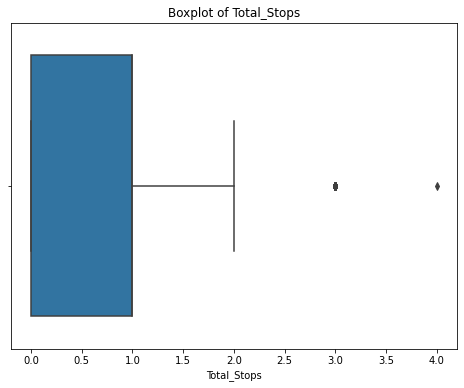

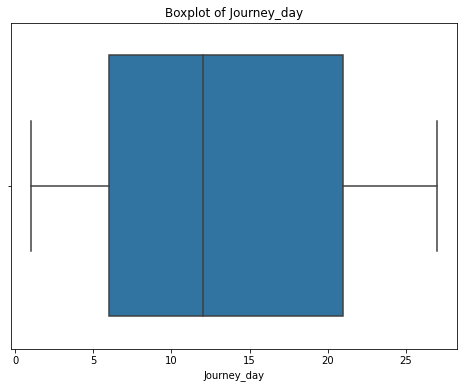

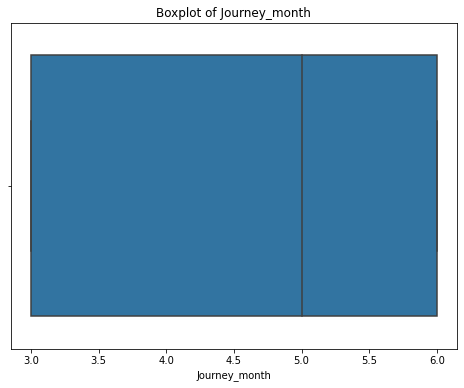

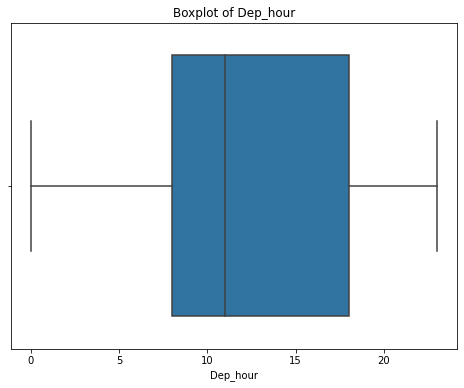

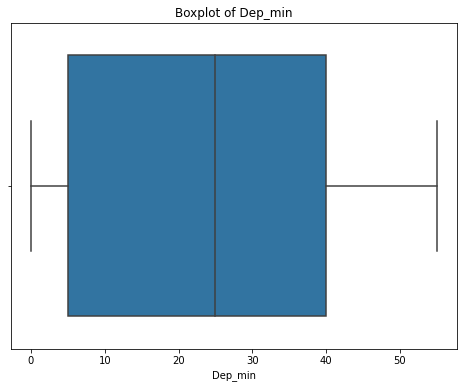

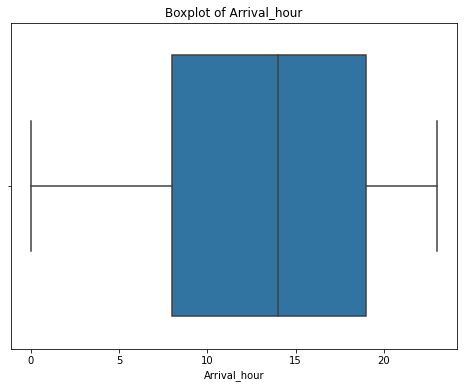

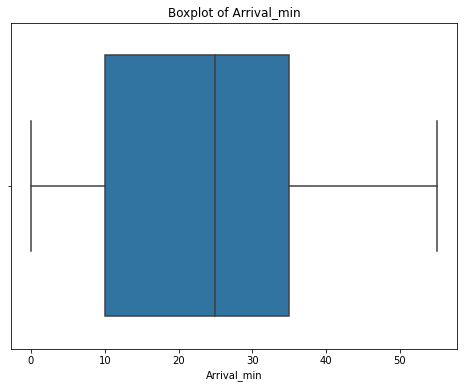

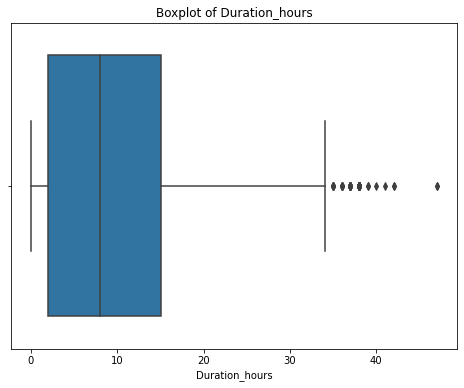

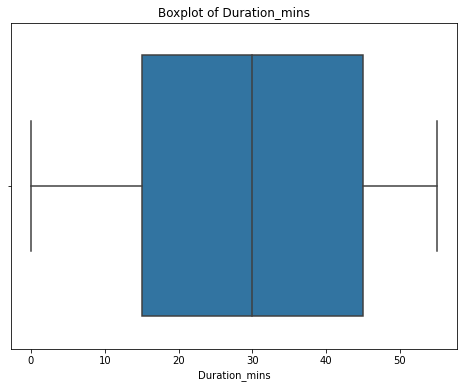

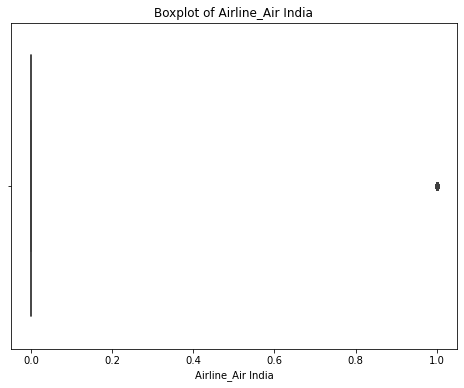

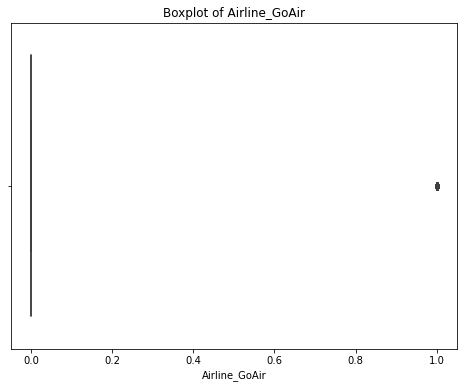

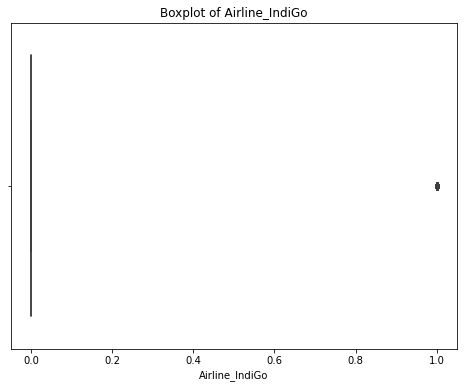

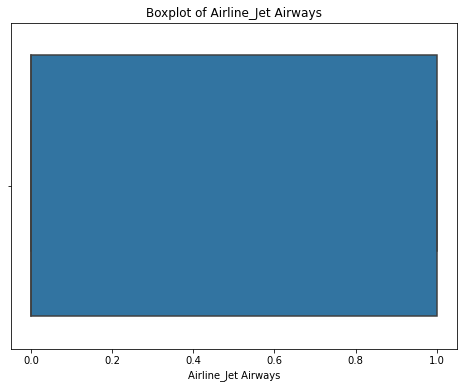

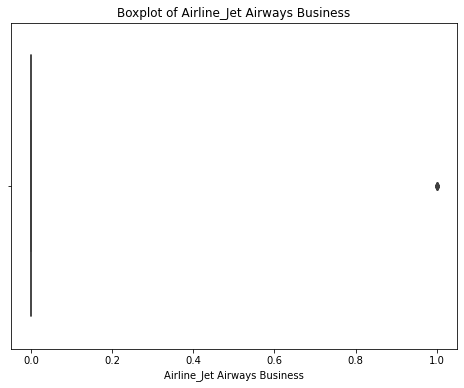

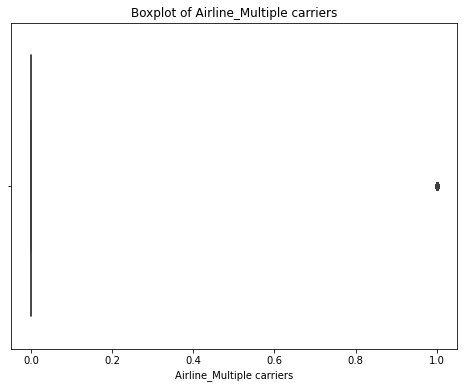

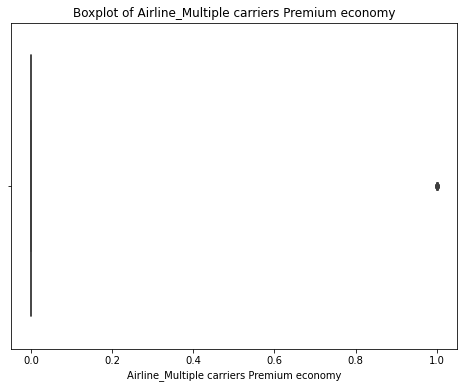

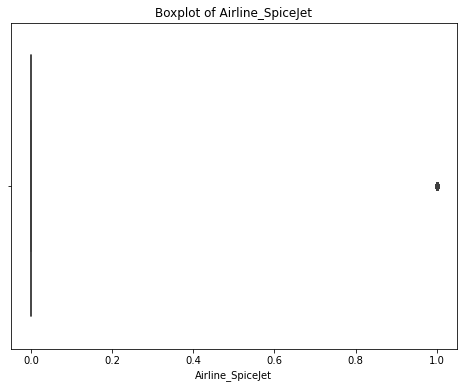

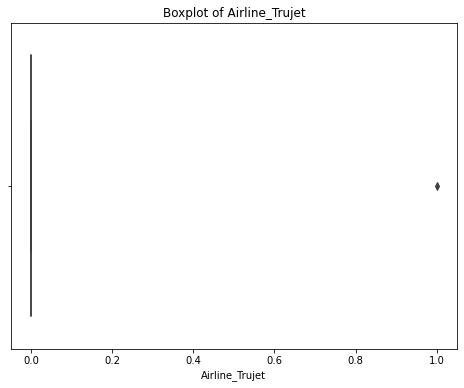

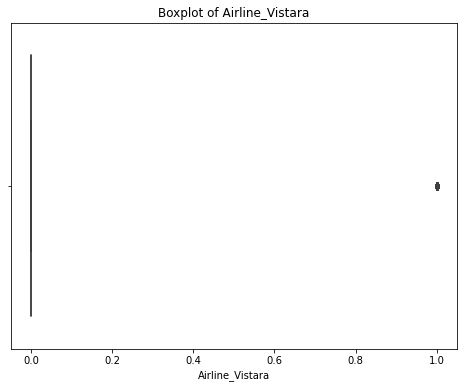

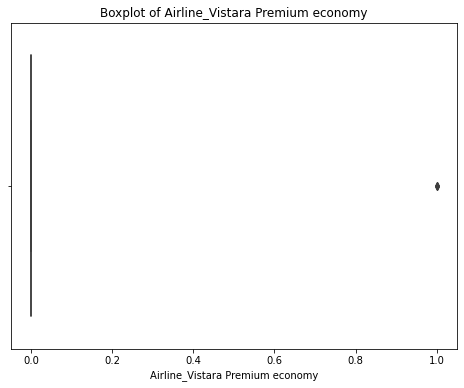

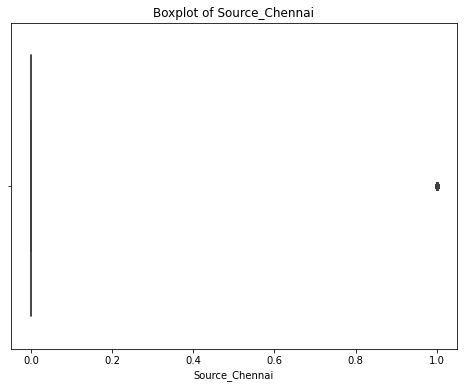

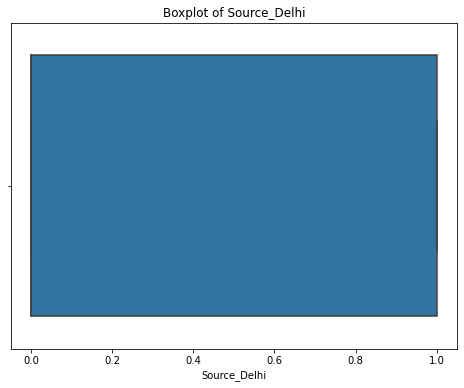

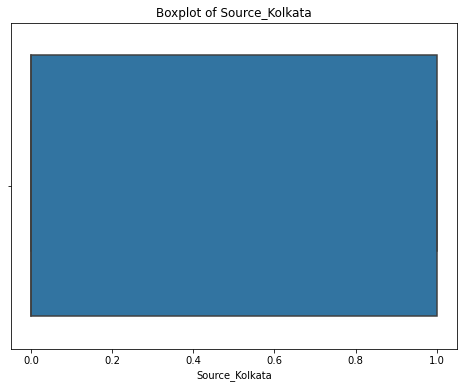

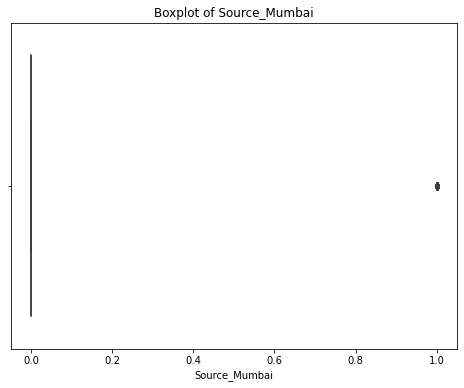

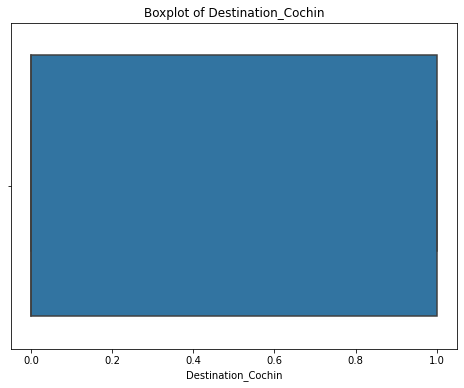

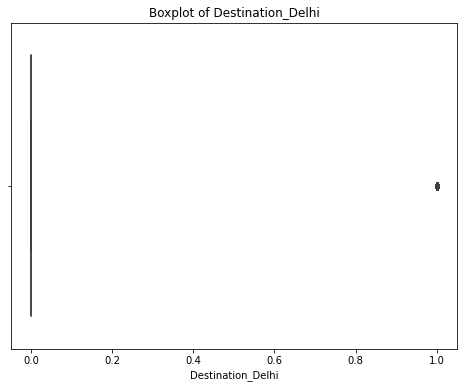

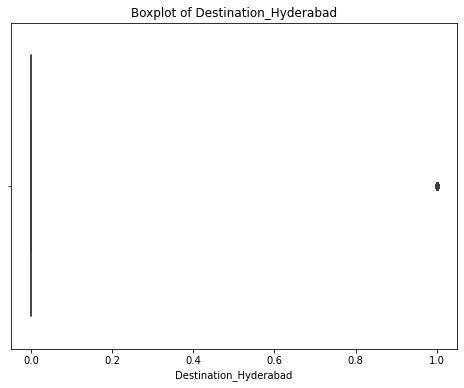

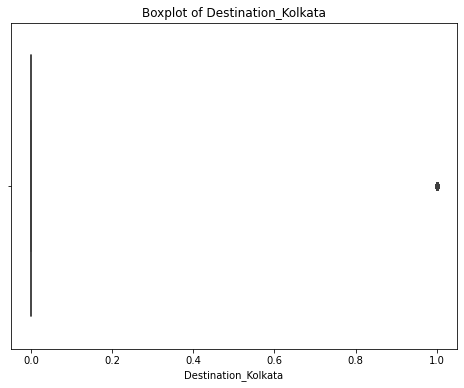

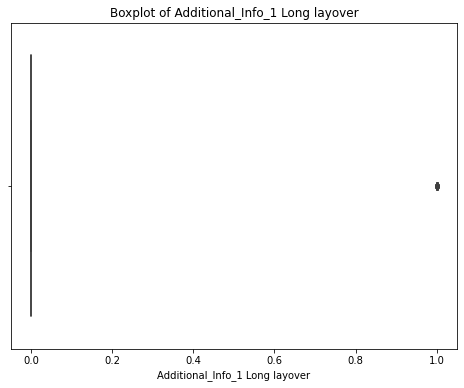

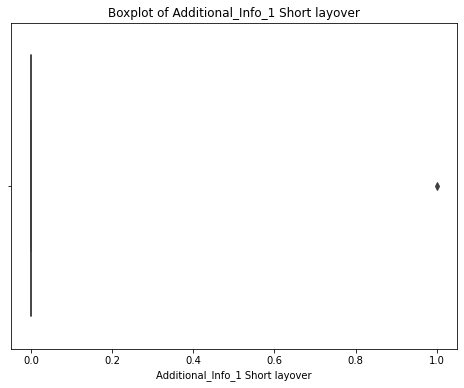

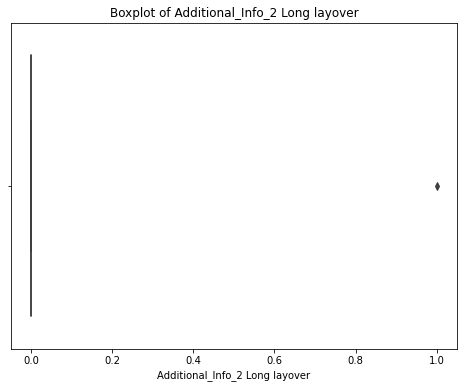

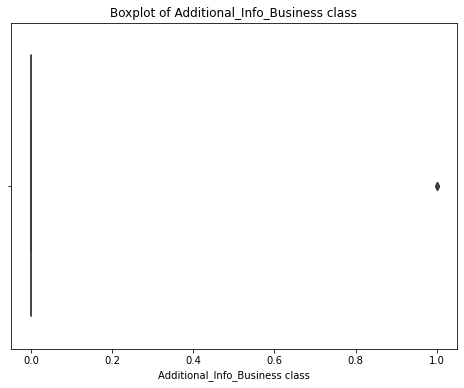

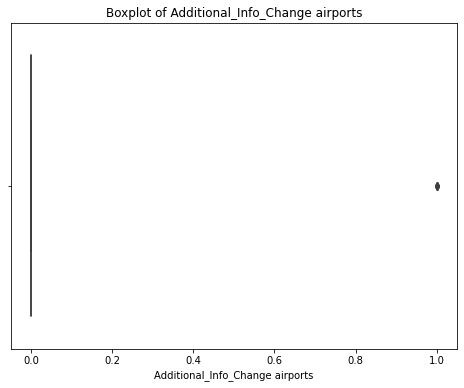

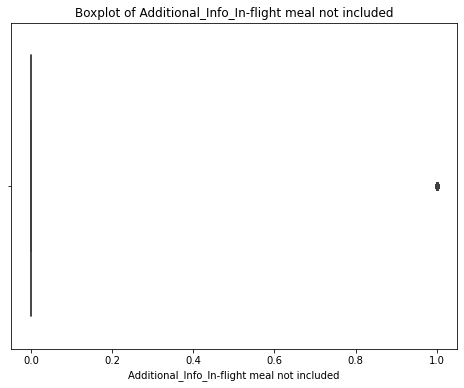

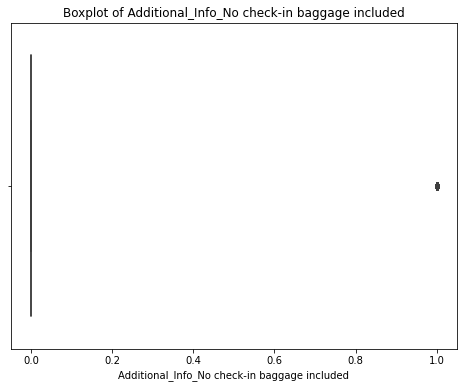

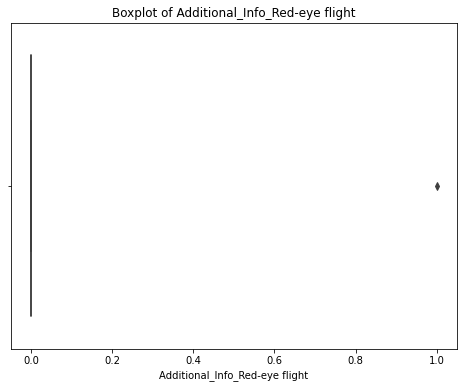

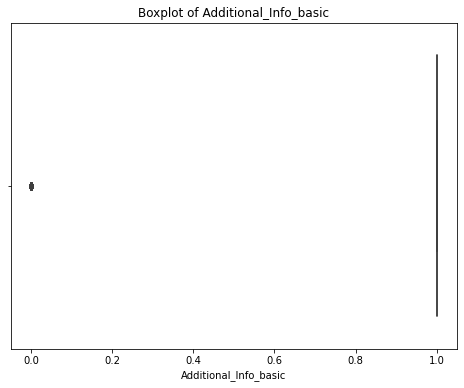

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for boxplots
features = ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
            'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
            'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
            'Airline_Jet Airways', 'Airline_Jet Airways Business',
            'Airline_Multiple carriers',
            'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
            'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
            'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
            'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
            'Destination_Kolkata','Additional_Info_1 Long layover',
            'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
            'Additional_Info_Business class', 'Additional_Info_Change airports',
            'Additional_Info_In-flight meal not included',
            'Additional_Info_No check-in baggage included',
            'Additional_Info_Red-eye flight', 'Additional_Info_basic']

# Create boxplots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [371]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Destination_Kolkata,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Additional_Info_basic
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,0,1
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,0,0,0,0,0,0,1
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,0,0,0,0,0,1
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [372]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

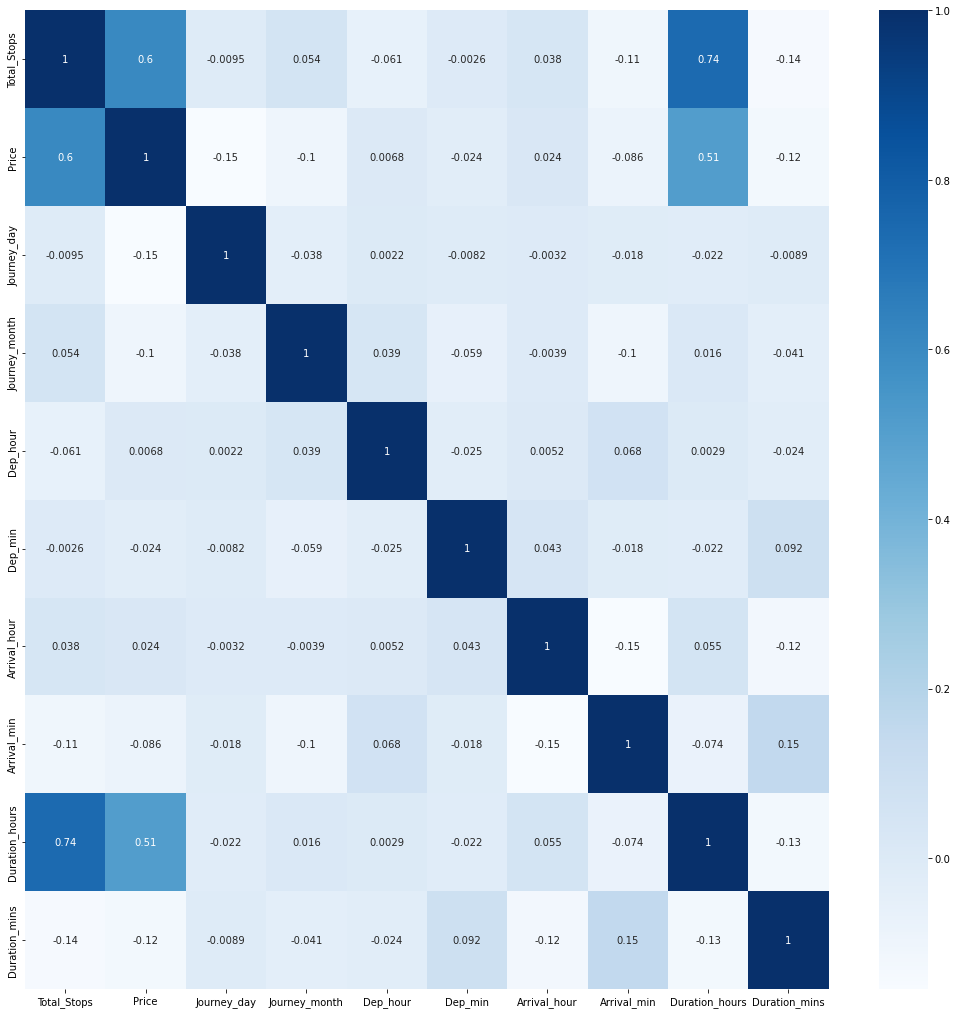

In [373]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "Blues")

plt.show()

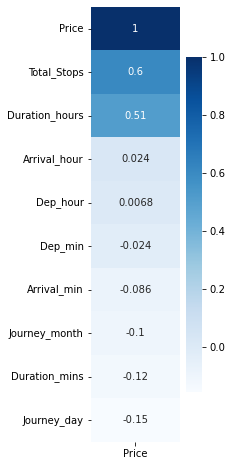

In [374]:
corr = train_data.corr()['Price'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

In [375]:
# data_train.drop['Duration_hours']

In [376]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_Red-eye flight', 'Additional_

In [377]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata','Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_Red-eye flight', 'Additional_Info_basic']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Destination_Kolkata,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Additional_Info_basic
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,0,0,0,0,0,1
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [378]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor(
    bootstrap=False, ccp_alpha=0.0, criterion='squared_error',
    max_depth=None, max_features='auto', max_leaf_nodes=None,
    max_samples=None, min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100, n_jobs=None, oob_score=False,
    random_state=None, verbose=0, warm_start=False
)

selection.fit(X, y)




ExtraTreesRegressor()

In [379]:
print(selection.feature_importances_)

[2.45111661e-01 9.56983222e-02 5.42189960e-02 2.05641787e-02
 1.83707956e-02 2.34312580e-02 1.56337127e-02 9.88784738e-02
 1.53300055e-02 9.31719452e-03 1.83995869e-03 1.99158168e-02
 1.31718121e-01 6.53196333e-02 1.74305142e-02 8.29528469e-04
 5.41660810e-03 1.10601956e-04 4.31433330e-03 5.46077417e-05
 7.56495143e-04 1.27815681e-02 5.20389526e-03 6.16945985e-03
 1.26451282e-02 2.51903988e-02 5.61204272e-03 7.08990282e-04
 2.18954054e-04 1.50057797e-04 1.18343936e-04 5.94834853e-04
 7.25896594e-04 7.90715050e-02 4.20850356e-05 1.05134156e-05
 6.49550940e-03]


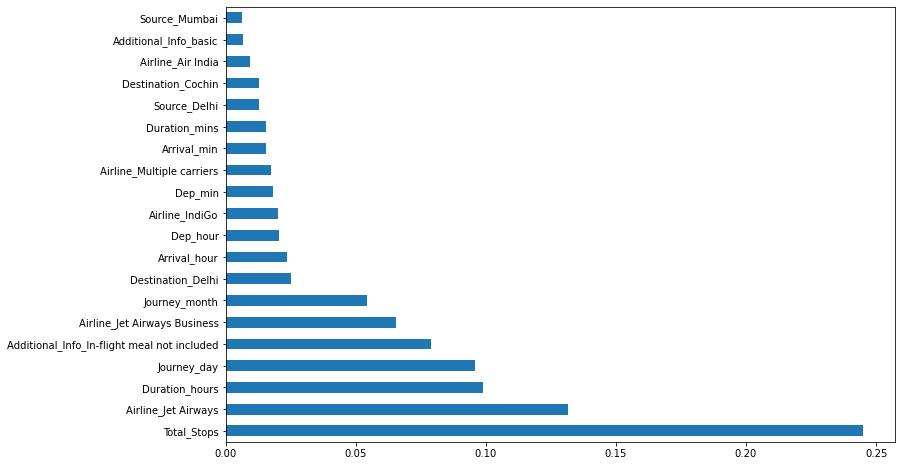

In [380]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Fitting model using Random Forest
Split dataset into train and test set in order to prediction w.r.t X_test
If needed do scaling of data
Scaling is not done in Random forest
Import model
Fit the data
Predict w.r.t X_test
In regression check RSME Score
Plot graph


In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
# Standardize the variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [382]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [383]:
# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=100)

# Fit the model to the training data
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R-squared:", r2_train)
print("----------------------------")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)
print("Test R-squared:", r2_test)


Train MSE: 373389.60863554047
Train RMSE: 611.0561419669558
Train MAE: 266.3502914569079
Train MAPE: 3.0104351615165807
Train R-squared: 0.9823786009785835
----------------------------
Test MSE: 2736534.998991723
Test RMSE: 1654.2475627885094
Test MAE: 651.9938455137644
Test MAPE: 7.453396005048058
Test R-squared: 0.8730856205061831


In [384]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree regressor
dt = DecisionTreeRegressor(random_state=100)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = dt.predict(X_train)

# Make predictions on the test set
y_test_pred = dt.predict(X_test)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R-squared:", r2_train)
print("----------------------------")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)
print("Test R-squared:", r2_test)


Train MSE: 95188.54876145895
Train RMSE: 308.52641501411017
Train MAE: 43.61837331772966
Train MAPE: 0.4895485961915488
Train R-squared: 0.9955077608985298
----------------------------
Test MSE: 3174964.6997868246
Test RMSE: 1781.8430626143327
Test MAE: 680.384807362346
Test MAPE: 7.751033250908853
Test R-squared: 0.8527522304897676


In [385]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an XGBRegressor
xgb = XGBRegressor(n_estimators=100, random_state=100)

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = xgb.predict(X_train)

# Make predictions on the test set
y_test_pred = xgb.predict(X_test)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R-squared:", r2_train)
print("----------------------------")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)
print("Test R-squared:", r2_test)


Train MSE: 641150.2867165867
Train RMSE: 800.7186064508471
Train MAE: 507.81649290635056
Train MAPE: 6.167928448084576
Train R-squared: 0.9697421546458829
----------------------------
Test MSE: 2124033.336044588
Test RMSE: 1457.4063729943643
Test MAE: 745.5851530397279
Test MAPE: 8.421088763938336
Test R-squared: 0.9014920792288043


In [389]:
from sklearn.linear_model import Ridge
ridge=Ridge()

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = ridge.predict(X_train)

# Make predictions on the test set
y_test_pred = ridge.predict(X_test)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R-squared:", r2_train)
print("----------------------------")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)
print("Test R-squared:", r2_test)


Train MSE: 6760729.00314323
Train RMSE: 2600.1401891327378
Train MAE: 1777.592727870504
Train MAPE: 21.643464110929592
Train R-squared: 0.6809404957052942
----------------------------
Test MSE: 6971265.857044874
Test RMSE: 2640.3154843777425
Test MAE: 1800.1900595418917
Test MAPE: 21.447933238141065
Test R-squared: 0.676688264224916


In [386]:
from sklearn.svm import SVR

# Create an SVR regressor
svr = SVR()

# Fit the model to the training data
svr.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = svr.predict(X_train)

# Make predictions on the test set
y_test_pred = svr.predict(X_test)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R-squared:", r2_train)
print("----------------------------")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)
print("Test R-squared:", r2_test)


Train MSE: 21139802.58921693
Train RMSE: 4597.8041051372475
Train MAE: 3526.4590174707564
Train MAPE: 47.85970486413954
Train R-squared: 0.0023479817239173695
----------------------------
Test MSE: 21577318.04500943
Test RMSE: 4645.139184675679
Test MAE: 3566.997723809153
Test MAPE: 48.89631828661519
Test R-squared: -0.0007078045163317892


Hyperparameter Tuning
Choose following method for hyperparameter tuning
RandomizedSearchCV --> Fast
GridSearchCV
Fit the model
Check best paramters and best score

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'n_estimators': [100, 200, 300]
# }

# # Create an instance of the XGBRegressor model
# xgb_model = xgb.XGBRegressor()

# # Create an instance of RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# # Fit the RandomizedSearchCV to the training data
# random_search.fit(X_train, y_train)

# # Print the best parameters found by RandomizedSearchCV
# print("Best parameters found:")
# print(random_search.best_params_)

# # Get the best model
# best_model = random_search.best_estimator_

# # Evaluate the best model on the test set
# test_predictions = best_model.predict(X_test)

In [401]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from scipy.stats import uniform

# Create a Ridge regression model
ridge = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': uniform(0, 1),  # Uniform distribution for the alpha parameter

              # Other hyperparameters if applicable
#               'max_iter': [100, 200, 300],
#               'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
              }

# Create the randomized search object
random_search = RandomizedSearchCV(ridge, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5)

# Fit the randomized search object to the training data
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)


In [407]:
from sklearn.linear_model import Ridge

ridge=Ridge(solver='auto', alpha=0.24626937545304906)

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = ridge.predict(X_train)

# Make predictions on the test set
y_test_pred = ridge.predict(X_test)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R-squared:", r2_train)
print("----------------------------")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)
print("Test R-squared:", r2_test)






Train MSE: 6731776.1466453625
Train RMSE: 2594.566658740022
Train MAE: 1773.841069525119
Train MAPE: 21.588207305384852
Train R-squared: 0.6823068696625747
----------------------------
Test MSE: 7025745.564798975
Test RMSE: 2650.6122999788136
Test MAE: 1801.6026029939542
Test MAPE: 21.421136529989614
Test R-squared: 0.6741616170937212


In [420]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Create a pipeline with StandardScaler and Lasso
model = make_pipeline(StandardScaler(with_mean=False), Lasso())

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R-squared:", r2_train)
print("----------------------------")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)
print("Test R-squared:", r2_test)


Train MSE: 6729260.271325499
Train RMSE: 2594.0817780720595
Train MAE: 1772.3814966560844
Train MAPE: 21.565382828531742
Train R-squared: 0.6824256015230071
----------------------------
Test MSE: 7049099.882290496
Test RMSE: 2655.0141020888186
Test MAE: 1801.7799978380517
Test MAPE: 21.40515363462092
Test R-squared: 0.6730784960249135


In [410]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV



# Define the parameter grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

# Create an instance of the XGBRegressor model
xgb_model = xgb.XGBRegressor()

# Create an instance of RandomizedSearchCV
# ridge_regressor=RandomizedSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
# ridge_regressor.fit(X,y)
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)
# Print the best parameters found by RandomizedSearchCV
print("Best parameters found:")
print(random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
test_predictions = best_model.predict(X_test)

Best parameters found:
{'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [416]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Create an instance of the xgb
xgb_model = xgb.XGBRegressor(subsample= 1.0, n_estimators=300, max_depth= 7, learning_rate= 0.1, colsample_bytree=1.0)
# Fit the classifier on the oversampled training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_pred = xgb_model.predict(X_test)


# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R-squared:", r2_train)
print("----------------------------")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)
print("Test R-squared:", r2_test)
# Train MSE: 641150.2867165867
# Train RMSE: 800.7186064508471
# Train MAE: 507.81649290635056
# Train MAPE: 6.167928448084576
# Train R-squared: 0.9697421546458829
# ----------------------------
# Test MSE: 2124033.336044588
# Test RMSE: 1457.4063729943643
# Test MAE: 745.5851530397279
# Test MAPE: 8.421088763938336
# Test R-squared: 0.9014920792288043


Train MSE: 6731776.1466453625
Train RMSE: 2594.566658740022
Train MAE: 1773.841069525119
Train MAPE: 21.588207305384852
Train R-squared: 0.6823068696625747
----------------------------
Test MSE: 7025745.564798975
Test RMSE: 2650.6122999788136
Test MAE: 1801.6026029939542
Test MAPE: 21.421136529989614
Test R-squared: 0.6741616170937212
